# PCA


In [1]:
# For reading data sets from the web.
import pandas
# For lots of great things.
import numpy as np
# To make our plots.
import matplotlib.pyplot as plt
%matplotlib inline
# Because sympy and LaTeX make
# everything look wonderful!
from sympy import *
init_printing(use_latex=True)
from IPython.display import display
# We will use this to check our implementation...
from sklearn.decomposition import PCA
# We will grab another data set using Keras
# after we finish up with Iris...
import keras
from sklearn import preprocessing

Using TensorFlow backend.


In [2]:
## load in data and split into x train and y train
data = np.array(pandas.read_csv("./comp_new_trainingdata.csv", header=0))
## Have to drop all teh rows that have nan values because they will not help with net
## clean out rows with nan values
data = data[~np.isnan(data).any(axis=1)]
print(data[:8])
data.shape

[[-46.28571429 -45.125      -47.14285714 -49.28571429 -55.5
  -54.85714286 -57.75       -59.125        0.        ]
 [-46.         -45.88888889 -46.55555556 -51.         -56.375
  -55.44444444 -58.11111111 -57.88888889   0.        ]
 [-45.88888889 -46.375      -49.55555556 -49.625      -56.22222222
  -54.88888889 -55.77777778 -58.77777778   0.        ]
 [-45.2        -49.2        -55.66666667 -55.33333333 -54.
  -55.         -51.66666667 -62.22222222   0.        ]
 [-46.         -49.         -57.         -55.33333333 -53.25
  -54.11111111 -52.11111111 -62.22222222   0.        ]
 [-46.33333333 -49.5        -56.75       -56.75       -53.5
  -55.44444444 -51.44444444 -61.44444444   0.        ]
 [-46.55555556 -49.         -55.42857143 -55.2        -53.66666667
  -54.66666667 -52.55555556 -61.88888889   0.        ]
 [-45.55555556 -48.         -56.66666667 -56.5        -53.88888889
  -55.66666667 -53.11111111 -62.33333333   0.        ]]


In [3]:
# vectors AND class labels...
X = data[:,0:8] # 0 thru 30
Y = data[:,8] # 30

# standardize X .. will mean center data
X = preprocessing.scale(X)

# Pretty-print with display()!
display(X.shape)
display(Y.shape)
display(Matrix(np.unique(Y)).T)
display(X[0:8])

[0.0  1.0  2.0]

array([[ 0.32964401,  0.67826807,  0.71532958,  0.57208406, -0.56197763,
         0.67553977, -0.26566949, -0.94444161],
       [ 0.42390209,  0.45470923,  0.8442069 ,  0.1083393 , -0.75681625,
         0.5522463 , -0.35292137, -0.73835761],
       [ 0.46055801,  0.31244452,  0.18588761,  0.48030124, -0.72279681,
         0.66887526,  0.21086004, -0.88655285],
       [ 0.6878247 , -0.51431673, -1.15513317, -1.06390441, -0.22796856,
         0.64554947,  1.20418918, -1.46080939],
       [ 0.42390209, -0.45578496, -1.44771953, -1.06390441, -0.06096402,
         0.83215581,  1.09680225, -1.46080939],
       [ 0.31393433, -0.60211438, -1.39285959, -1.44713792, -0.1166322 ,
         0.5522463 ,  1.25788265, -1.33113856],
       [ 0.24062249, -0.45578496, -1.10288561, -1.02783537, -0.15374432,
         0.71552685,  0.98941531, -1.40523618],
       [ 0.57052576, -0.16312611, -1.37457294, -1.37950848, -0.20322714,
         0.50559472,  0.85518164, -1.4793338 ]])

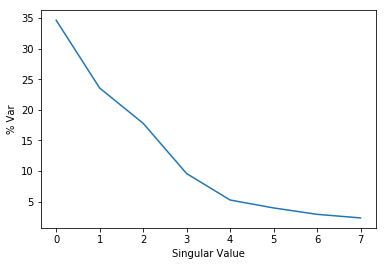

In [4]:
U,S,V = np.linalg.svd(X,full_matrices=True)

# Percent variance accounted for
plt.plot(100.0*S/np.sum(S))
plt.ylabel('% Var')
plt.xlabel('Singular Value')
plt.show()

In [5]:
# Variance accounted for in the first two principal components
100.0*(S[0]+S[1])/np.sum(S)

In [6]:
# Scale the singular vectors, resulting in a rotated form of our mean-centered data
D = np.zeros([X.shape[0],X.shape[1]])
np.fill_diagonal(D,S)
Xrotated = np.dot(U,D)
# Extract just the first two principal components!
PCs = Xrotated[:,0:2]
PCs.shape

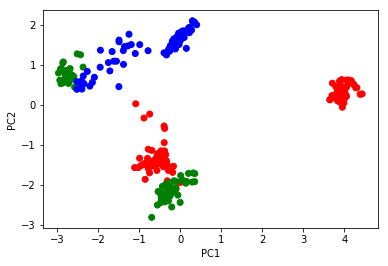

In [7]:
# The x and y values come from the two
# Principal Components and the colors for
# each point are selected based on the
# corresponding class for each point...
plt.scatter(PCs[:,0],PCs[:,1],
color=[['red','green','blue'][i] for i in Y.astype(int)])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

The data suggest that we have fairly clearly descision boundries.  A simple MLP with linear activation functions should have no trouble classifying our locations but if it does we will likely use a RELU or sigmoid instead.  It remains to be seen how well the network will be able to generalize.